<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_YB/blob/main/HW0414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 03. 평가

[분류 성능 평가 지표]
* 정확도 (Accuracy)
* 오차행렬 (Confusion Matrix)
* 정밀도 (Precision)
* 재현율 (Recall)
* F1 스코어
* ROC AUC

##01. 정확도 (Accuracy)

* 정확도 : 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
* 정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

In [1]:
import numpy as np

In [2]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  #fit() 메서드는 아무것도 학습하지 않음
  def fit(self, X, y=None):
    pass
  # predict(  메서서드는 단순히 Sex feature가 1이면 0 , 그렇지 않으면 1로 예측
  def predict(self, X):
      pred = np.zeros( ( X.shape[0], 1 ))
      for i in range (X.shape[0]) :
          if X['Sex'].iloc[i] == 1:
              pred[i] = 0
          else :
              pred[i] = 1
        
      return pred

In [3]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회/데이터/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
from sklearn.preprocessing import LabelEncoder
#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [9]:
#생성된 MyDummyClassifier를 이용해 앞 장의 타이타닉 생존자 예측 수행
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df=pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회/데이터/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)
X_titanic_df=transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, 
                                                  test_size=0.2, random_state=0)

#위에서 생성한 Dummy Classifier를 이용해 학습/평가/예측 수행
myclf=MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions=myclf.predict(X_test)
print('Dummy Classifier의 정확도:, {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도:, 0.7877


이렇게 단순 알고리즘으로 예측해도 정확도 결과는 약 78.77%로 꽤 높은 수치가 나올 수 있기 때문에 정확도를 평가 지표로 사용할 때는 매우 신중해야 함. 특히 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아님

[MNIST 데이터 세트]
* MNIST 데이터 세트를 변환해 불균형한 데이터 세트로 만든 뒤에 정확도 지표 적용 시 어떤 문제가 생기는지 살펴보기
* 0부터 9까지의 숫자 이미지의 픽셀 정보를 가지고 있으며, 이를 기반으로 숫자 digit 예측에 사용

In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(Self,X,y):
    pass

  #입력값으로 들어오는 X데이터 세트의 크기만큼 모두 0값으로 만들어서 변환
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)

#사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST데이터 로딩
digits=load_digits()

#digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y=(digits.target==7).astype(int)
X_train, X_test, y_train, y_test=train_test_split(digits.data, y, random_state=11)

In [11]:
#불균형한 데이터로 생성한 y_test의 데이터 분포도를 확인하고 MyFakeClassifier 이용해 예측, 평가
#불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier로 학습/예측/정확도 평가
fakeclf=MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


단순히 predict()의 결과를 np.zeros()로 모두 0 값으로 반환함에도 불구하고 450개의 테스트 데이터 세트에 수행한 예측 정확도는 90% -> 단지 모든 것을 0으로 예측해도 정확도가 90%라는 것은 말도 안되는 결과

-> 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용 X

-> 정확도가 가지는 한계점을 극복하기 위해서 여러가지 분류 지표와 함께 적용해야 함

##02. 오차 행렬

* 오차행렬(혼동행렬) : 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표
* 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표

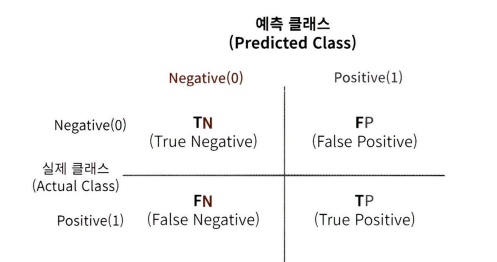

* Negative 값 : 0 / Positive 값 : 1
* TN : 예측값 0으로 예측, 실제값 0
* FP : 예측값 1로 예측, 실제값 0
* FN : 예측값 0으로 예측, 실제값 1
* TP : 예측값 1로 예측, 실제값 1

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

TN:405, FP:0, FN:45, TP:0

정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN + TP)/(TN + FP + FN + TP)

##03. 정밀도와 재현율

* positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
* 정밀도 : TP / (FP + TP)
* 정밀도(양성 예측도) : 예측을 positive로 한 대상 중에 예측과 실제 값이 positive로 일치한 데이터의 비율
* 재현율 : TP / (FN + TP)
* 재현율(민감도, TPR) : 실제 값이 positive인 대상 중에 실제 값이 positive로 일치한 데이터의 비율
* 재현율이 중요 지표인 경우 : 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 (ex)암 판단 모델, 금융 사기 적발 모델
* 정밀도가 중요 지표인 경우 : 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 (ex)스팸메일 여부를 판단하는 모델
* 둘 다 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN을, 정밀도는 FP를 낮추는 데 초점
* 가장 좋은 성능 평가 : 재현율, 정밀도 모두 높은 수치

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion=confusion_matrix(y_test, pred)
  accuracy=accuracy_score(y_test, pred)
  precision=precision_score(y_test, pred)
  recall=recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도:{0:.4f}, 정밀도:{1:.4f}'.format(accuracy, precision, recall))

In [14]:
# 로지스틱 회귀 기반으로 타이타닉 생존자 예측 후 confusion mtx, accracy, precision, reacall 수행
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df=pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회/데이터/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)
X_titanic_df=transform_features(X_titanic_df)

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, 
                                                  test_size=0.20, random_state=11)
lr_clf=LogisticRegression()

lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정밀도에 비해 재현율이 낮음

###정밀도/재현율 트레이드오프

* 의미 : 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움
* 사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구하고 예측 확률이 큰 레이블값으로 예측
* 이진 분류에서는 임곗값을 0.5로, 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정

In [15]:
pred_proba=lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print('pred_proba()결과 Shape:{0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

#예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result=np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3])

pred_proba()결과 Shape:(179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46197474 0.53802526]
 [0.87872398 0.12127602]
 [0.87719492 0.12280508]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.46197474 0.53802526 1.        ]
 [0.87872398 0.12127602 0.        ]
 [0.87719492 0.12280508 0.        ]]


* 반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫번째 칼럼 값과 두번째 칼럼 값을 더하면 1이 됨
* 두 개의 칼럼 중에서 더 큰 확률 값으로 predict() 메서드가 최종 예측함

In [16]:
# 사이킷런의 정밀도/재현율 트레이드오프 방식 이해를 위한 예제
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],
   [2,0,0],
   [0,1.1,1.2]]
   
# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


입력된 X 데이터 세트에서 Binarizer의 threshold 값이 1.1보다 같거나 작으면 0, 크면 1로 변환됨

In [17]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold=0.5

#predict_proba() 변환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742


앞 예제의 타이타닉 데이터로 학습된 로지스틱 회귀 Classifier 객체에서 호출된 predict()로 계산된 지표 값과 정확히 같음

-> predict()가 predict_proba()에 기반함을 알 수 있음

In [18]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold=0.4
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도:0.8324, 정밀도:0.7183


임계값을 낮추니 재현율이 올라가고 정밀도가 떨어짐

-> 이유 : 분류 결정 임곗값은 Positive 예측값을 결정하는 기준이 됨. 확률이 0.5가 아닌 0.4로부터 positive로 예측을 더 너그럽게 하기 때문에 임곗값을 낮출수록 True 값이 많아지게 됨.
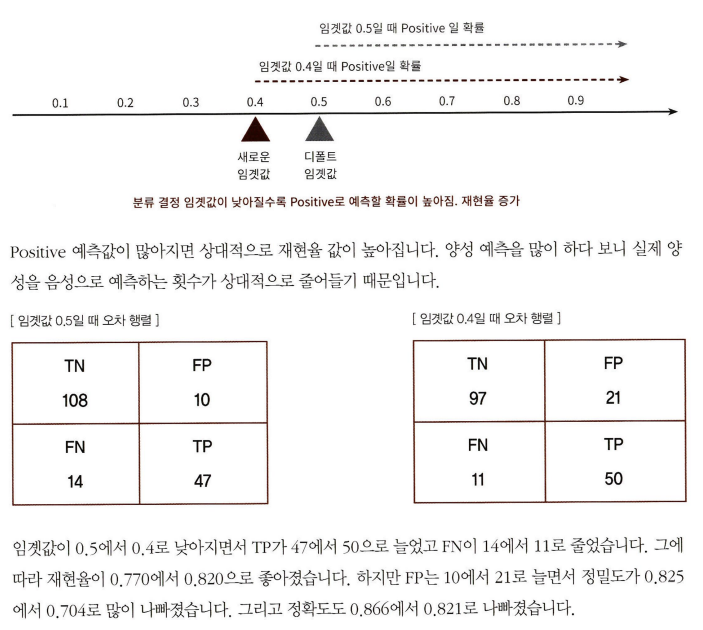

In [19]:
# 임곗값을 0.4에서부터 0.6까지 0.05씩 증가시키며 평가지표 조사
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds=[0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  #thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict=binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도:0.8324, 정밀도:0.7183
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도:0.8492, 정밀도:0.7656
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도:0.8659, 정밀도:0.8364
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도:0.8771, 정밀도:0.8824


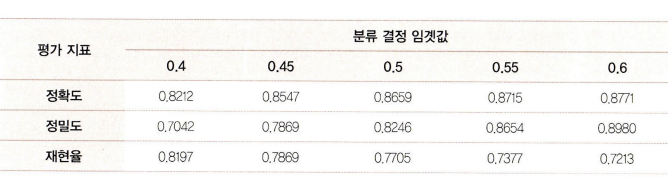

In [20]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds=precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출
thr_index=np.arange(0,thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값: [0.01 0.09 0.11 0.13 0.15 0.23 0.35 0.5  0.63 0.75 0.89]
샘플 임계값별 정밀도: [0.341 0.372 0.415 0.448 0.505 0.585 0.688 0.774 0.913 0.935 0.938]
샘플 임계값별 재현율: [1.    1.    0.967 0.918 0.902 0.902 0.869 0.787 0.689 0.475 0.246]


임곗값이 증가할수록 정밀도 값은 동시에 높아지거나 재현율 값은 낮아짐

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [23]:
#정밀도와 재현율 곡선 시각화

def precision_recall_curve_plot(y_test, pred_proba_c1):
  #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds=precision_recall_curve(y_test, pred_proba_1)

  #X축: threshold, Y축: 정밀도, 재현율 값으로 plot(정밀도는 점선)
  plt.figure(figsize=(8,6))
  threshold_boundary=thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  #threshold값 X축의 Scale을 0.1 단위로 변경
  start, end=plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

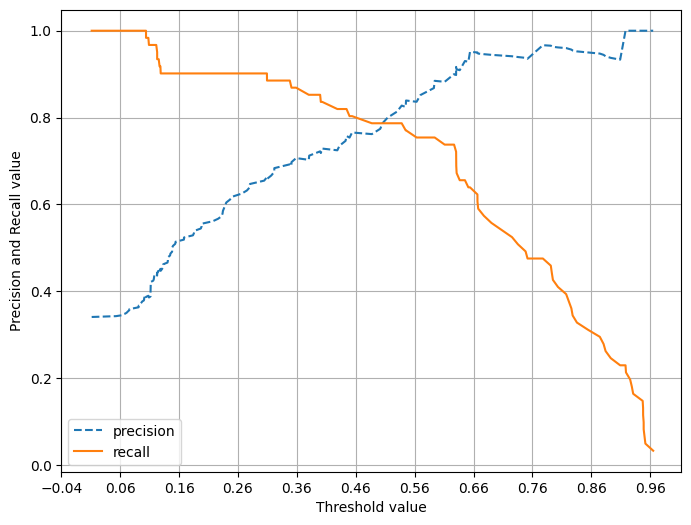

In [24]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

정밀도는 점선, 재현율은 실선으로 표현

임곗값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐

임곗값을 계속 증가시킬수록 재현율 값은 낮아지고 정밀도 값이 높아지는 반대의 양상이 됨

### 정밀도와 재현율의 맹점

[정밀도가 100%가 되는 방법]

확실한 기준이 되는 경우만 positive로 예측하고 나머지는 모두 negative로 예측함

ex) 환자가 80세 이상이고 비만이며 이전에 암 진단을 받았고 암 세포의 크기가 상위 0.1% 이상이면 무조건 postive, 다른 경우는 negative로 예측

[재현율이 100%가 되는 방법]

모든 환자를 positive로 예측

이처럼 정밀도와 재현율 성능 수치도 어느 한쪽만 참조하면 극단적인 수치 조작이 가능

-> 정밀도 또는 재현율 중 하나만 스코어가 좋고 다른 하나는 스코어가 나쁜 분류는 성능이 좋지 않은 분류로 간주

##04. F1 스코어

* F1 스코어 : 정밀도와 재현율을 결합한 지표로, 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐
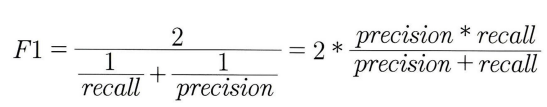

In [25]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred)
print('F1 스코어:{0:.4f}'.format(f1))

F1 스코어:0.7805


In [26]:
# 타이타닉 생존자 예측에서 임곗값을 변화시키면서 F1 스코어를 포함한 평가 지표 구하기
def get_clf_eval(y_test, pred):
  confusion=confusion_matrix(y_test, pred)
  accuracy=accuracy_score(y_test, pred)
  precision=precision_score(y_test, pred)
  recall=recall_score(y_test, pred)

  #F1 스코어 추가
  f1=f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  #f1 score print 추가
  print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

In [27]:
thresholds=[0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)
     

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도:0.8324, 정밀도:0.7183, 재현율:0.8361, F1:0.7727
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도:0.8492, 정밀도:0.7656, 재현율:0.8033, F1:0.7840
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현율:0.7869, F1:0.7805
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도:0.8659, 정밀도:0.8364, 재현율:0.7541, F1:0.7931
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도:0.8771, 정밀도:0.8824, 재현율:0.7377, F1:0.8036


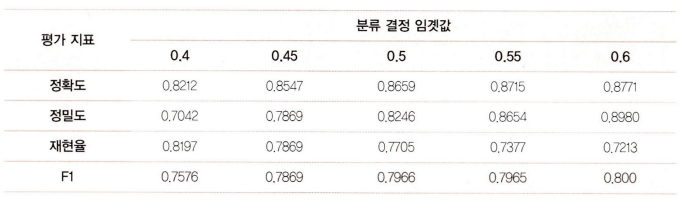

F1 스코어는 임곗값이 0.6일 때 가장 좋은 값을 보여줌. 하지만 임곗값이 0.6인 경우에는 재현율이 크게 감소함

##05. ROC 곡선과 AUC

* ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표
* ROC 곡선 (수신자 판단 곡선) : FPR(False positive rate)이 변할 때 TPR(True positive rate)가 어떻게 변하는지 나타내는 곡선
* 민감도(TPR) : 실제값 positive가 정확히 예측돼야 하는 수준 (질병이 있는 사람은 질병이 있는 것으로 양성 판정)
* 민감도 = TP / (FN + TP)
* 특이성(TNR) : 실제값 negative가 정확히 예측돼야 하는 수준 (질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)
* 특이성 = TN / (FP + TN)
* FPR = FP / (FP + TN) = 1 - TNR


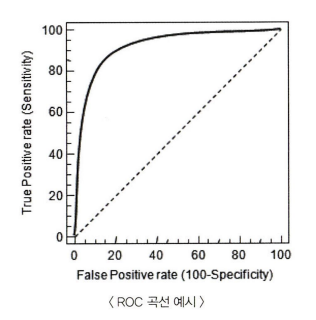

* 가운데 직선 : ROC 곡선의 최저 값
* ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것
* FPR을 0부터 1까지 변경하기 위해서는 분류 결정 임곗값을 변경하면 됨
* FPR을 0으로 만들려면 임곗값을 1로 지정 
* FPR을 1로 만들려면 TN을 0으로 만들면 됨. TN을 0으로 만들려면 분류 결정 임곗값을 0으로 지정하면 됨.

roc_curve()의 주요 입력 파라미터와 반환 값
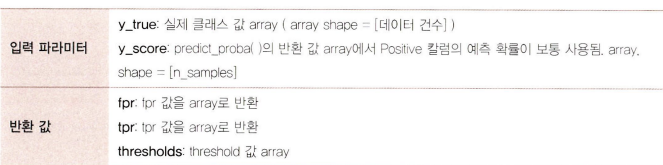

In [28]:
from sklearn.metrics import roc_curve

#레이블 값이 1일 때의 에측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds=roc_curve(y_test, pred_proba_class1)
#반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 step으로 추출
#thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index=np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

#5step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPRL', np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임곗값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPRL [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


임곗갑이 1에 가까운 값에서 점점 작아지면서 FPR이 커짐. FPR이 조금씩 커질 때 TPR은 가파르게 커짐

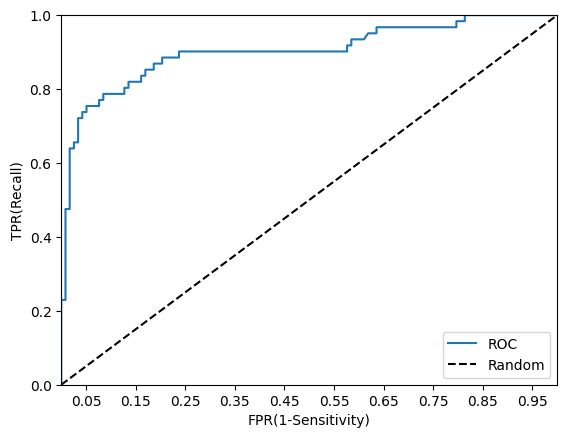

In [29]:
#FPR 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화
def roc_curve_plot(y_test, pred_proba_c1):
  #임곗값에 따른 FPR, TPR 값을 반환받음
  fprs, tprs, thresholds=roc_curve(y_test, pred_proba_c1)
  #ROC 곡선을 그래프 곡선으로 그림
  plt.plot(fprs, tprs, label='ROC')
  #가운데 대각선 직선을 그림
  plt.plot([0,1],[0,1], 'k--', label='Random')

  #FPR X축의 Scale을 0.1 단위로 변경, X,Y축 명 설정
  start, end=plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('FPR(1-Sensitivity)')
  plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

* AUC 값 : ROC 곡선 밑의 면적을 구한 것으로, 1에 가까울수록 좋음
* AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건
* 가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은 ROC AUC 성능 수치를 얻음
* 보통의 분류는 0.5 이상의 AUC 값을 가짐

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_taregt, preds))
print('정확도:', np.round(accuracy_score(y_target, preds),4))
print('정밀도:', np.round(precision_score(y_target, preds),4))
print('재현율:', np.round(recall_score(y_target, preds),4))

In [32]:
from sklearn.metrics import roc_auc_score
pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8341


In [31]:
#get_clf_eval(): 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 값까지 출력하는 함수
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion=confusion_matrix(y_test, pred)
  accuracy=accuracy_score(y_test, pred)
  precision=precision_score(y_test, pred)
  recall=recall_score(y_test, pred)
  f1=f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc=roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
     